In [6]:
import sys
src_path = "..\\src"
src_path_2 = "..\\venv"

if src_path not in sys.path:
    sys.path.insert(0, src_path)

sys.path.append('C:/Users/sofie/OneDrive - NTNU/4. semester/TDT4114 Anvendt programmering/Milj-dataanalyse/venv/Lib/site-packages')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from pandasql import sqldf

# Vi har lagt alle funksjonene våre i en egen fil
import functions as fc

# Forberedelser
### Laster ned datasettet

In [7]:
# Laster inn datasettet og kaller det temperature
temperature = pd.read_csv('../data/temperature.csv')

### Forstå data
Undersøker hvilke datatyper vi har og hvordan datasettet ser ut for å bli kjent med det og lettere jobbe med det senere.

In [8]:
# Viser de fem første linjene
temperature.head()

,Unnamed: 0,verdi,tidsforskyvning,referansetid
0,0,-4.9,PT0H,2024-01-01T00:00:00.000Z
1,1,-3.8,PT6H,2024-01-01T00:00:00.000Z
2,2,-7.4,PT0H,2024-01-02T00:00:00.000Z
3,3,-5.3,PT6H,2024-01-02T00:00:00.000Z
4,4,-8.5,PT0H,2024-01-03T00:00:00.000Z


In [9]:
# Viser typen til datasettet
print('type:', type(temperature))

# Viser hvor mange rader og linjer datasettet har
print('form:', temperature.shape)

type: <class 'pandas.core.frame.DataFrame'>
form: (1460, 4)


In [10]:
# Forteller hvilke datatyper de ulike kolonnene har
# Forteller også om det mangler verdier
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1460 non-null   int64  
 1   verdi            1460 non-null   float64
 2   tidsforskyvning  1460 non-null   object 
 3   referansetid     1460 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 45.8+ KB


In [11]:
# printer høyeste og laveste temperatur
print('Den minste verdien er:', temperature['verdi'].min())
print('Den høyeste verdien er:', temperature['verdi'].max())

Den minste verdien er: -18.9
Den høyeste verdien er: 23.3


In [12]:
# Viser ti tilfeldige linjer
temperature.sample(10)

,Unnamed: 0,verdi,tidsforskyvning,referansetid
146,146,6.2,PT0H,2024-03-14T00:00:00.000Z
607,607,4.2,PT6H,2024-10-30T00:00:00.000Z
686,686,-1.8,PT0H,2024-12-09T00:00:00.000Z
758,758,-8.9,PT0H,2024-01-15T00:00:00.000Z
136,136,0.9,PT0H,2024-03-09T00:00:00.000Z
1180,1180,16.6,PT0H,2024-08-13T00:00:00.000Z
1075,1075,10.4,PT6H,2024-06-21T00:00:00.000Z
1147,1147,18.9,PT6H,2024-07-27T00:00:00.000Z
1353,1353,5.5,PT6H,2024-11-07T00:00:00.000Z
508,508,11.7,PT0H,2024-09-11T00:00:00.000Z


In [13]:
# Viser de fem siste linjene
temperature.tail()

,Unnamed: 0,verdi,tidsforskyvning,referansetid
1455,1455,1.1,PT6H,2024-12-28T00:00:00.000Z
1456,1456,1.7,PT0H,2024-12-29T00:00:00.000Z
1457,1457,2.8,PT6H,2024-12-29T00:00:00.000Z
1458,1458,0.2,PT0H,2024-12-30T00:00:00.000Z
1459,1459,1.0,PT6H,2024-12-30T00:00:00.000Z


### Manglende verdier
Selv om vi sjekket hele datasettet og bare gikk videre med de kollonene som hadde alle dataene, er det greit å dobbeltsjekke at vi ikke mangler noen tall.

Unnamed: 0         0
verdi              0
tidsforskyvning    0
referansetid       0
dtype: int64
Empty DataFrame
Columns: [Unnamed: 0, verdi, tidsforskyvning, referansetid]
Index: []


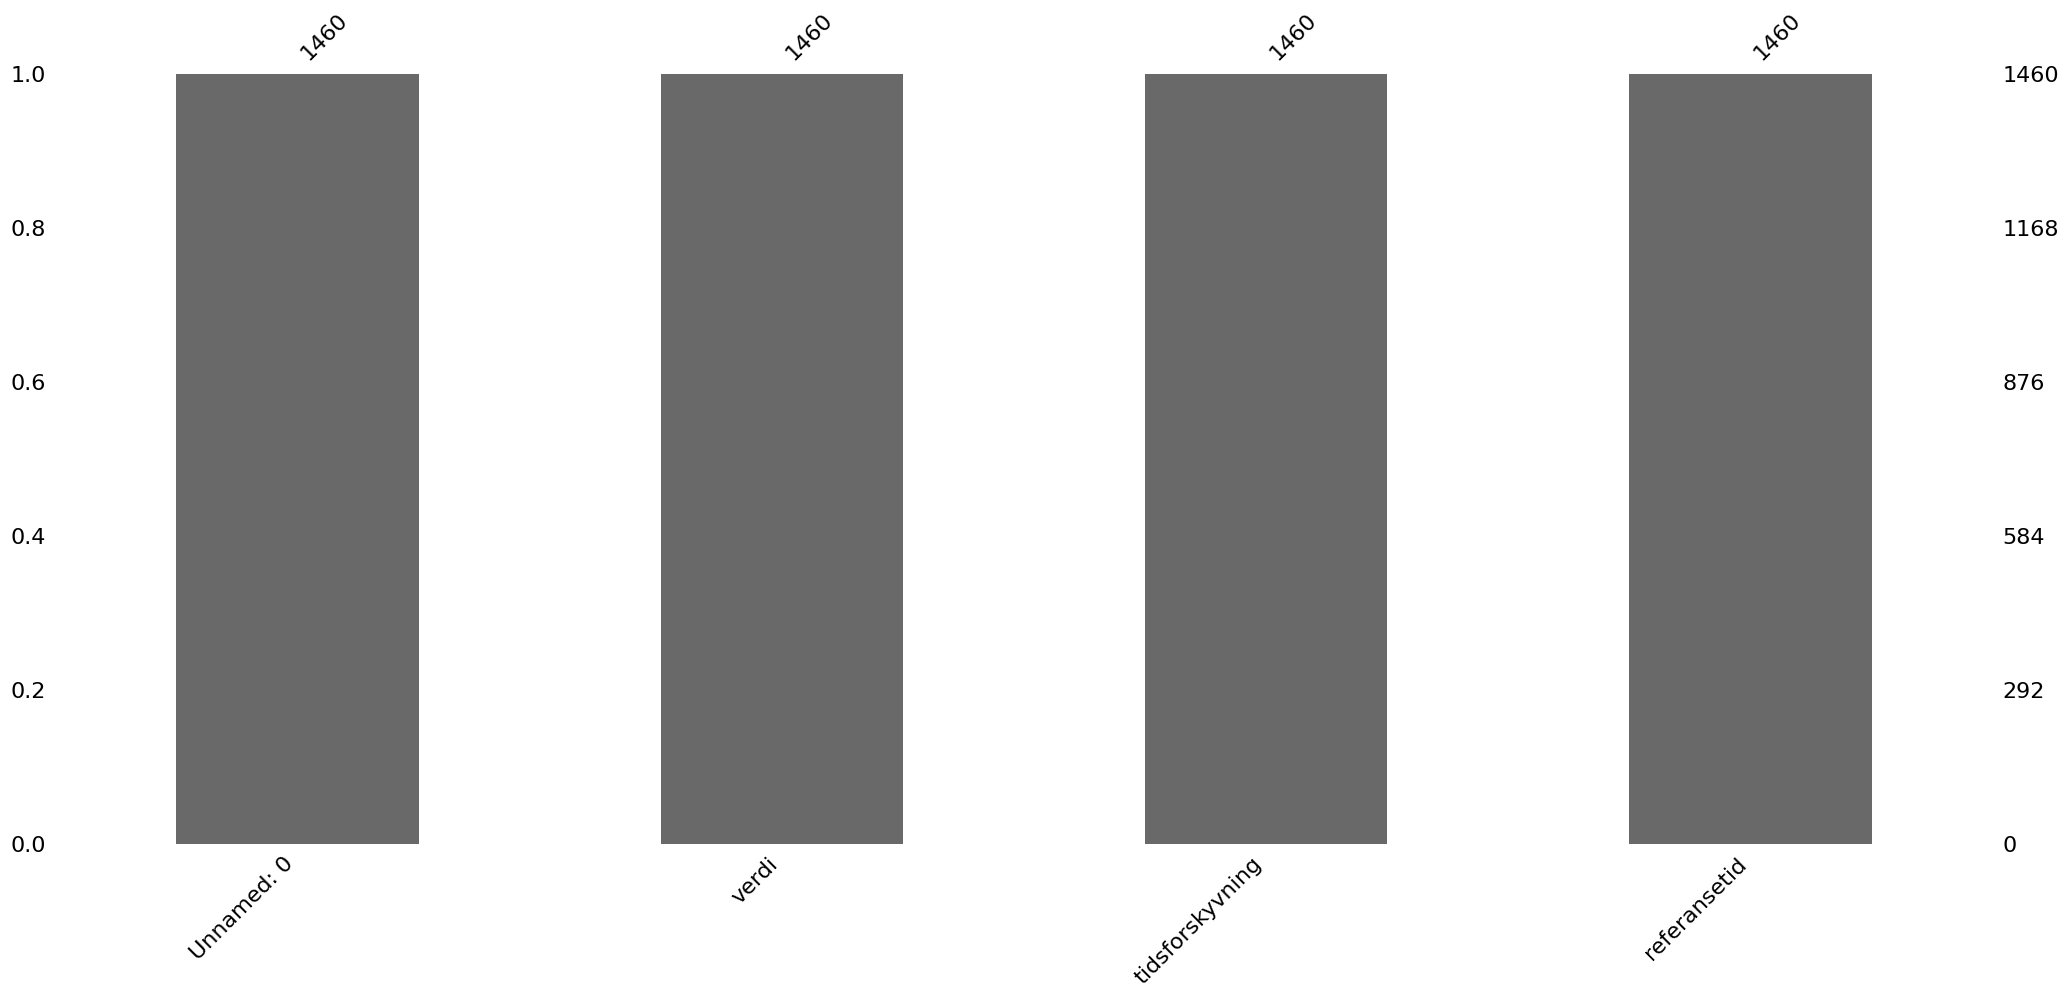

In [14]:
# Sjekker hvor mange av verdiene som mangler
fc.missing_numbers(temperature)

In [15]:
positive = temperature.query('verdi >= 0 and verdi <= 30')
print(f'Det er {len(positive)} temperaturer som er 0 eller høyere')

negative = temperature.query('verdi >= -20 and verdi < 0')
print(f'Det er {len(negative)} temperaturer som mindre enn 0')

print(f'Det er til sammens {len(positive) + len(negative)} verdier')

Det er 1134 temperaturer som er 0 eller høyere
Det er 326 temperaturer som mindre enn 0
Det er til sammens 1460 verdier


### Ekstreme verdier
Siden datasettet ikke inneholder noen ekstreme verdier, har vi valgt å legge inn noen. Dette er for å vise at vi vet hva som kan gjøres om vi har verdier som ikke burde være med i analysen.

referansetid er gjort om til DateTime
[ 147  676 1304 1372 1427]
[15 19 15 16 19]
Den minste verdien er: -131.1
Den høyeste verdien er: 81.0


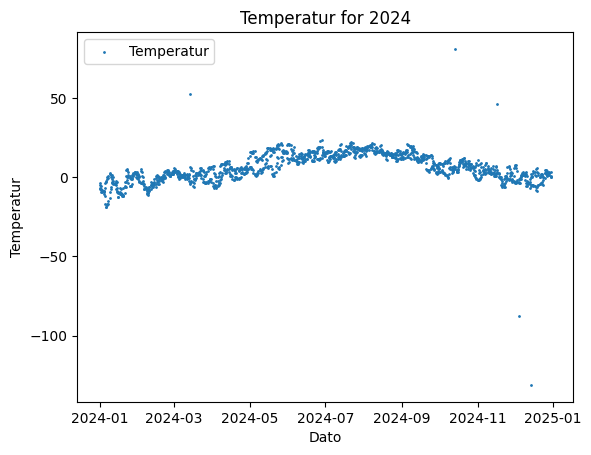

In [16]:
# Gjør referansetid om til datetime for å bruke i diverse utregninger
date = fc.make_datetime(temperature)

# Lagrer de linjene i temperature det går utover
np.random.seed(123)

# Sier jeg vil ha 5 verdier og at de skal velges ut ifra lengden på temperature
numExtreme = 5
mod_indices = np.random.choice(len(temperature), numExtreme, replace=False)
print(mod_indices)

# Velger så 5 verdier mellom 15 og 19 
extreme_value = np.random.randint(15, 20, len(mod_indices))
print(extreme_value)

# Så ganger jeg de valgte verdiene i temperature med extreme_values
temperature.loc[mod_indices, 'verdi'] *= extreme_value

# Printer hva den høyeste og laveste verdien er 
print('Den minste verdien er:', temperature['verdi'].min())
print('Den høyeste verdien er:', temperature['verdi'].max())

# Visualiserer datasettet med extreme verdier
plt.scatter(date, temperature['verdi'], label="Temperatur", s=1)
plt.xlabel('Dato') 
plt.ylabel('Temperatur') 
plt.title('Temperatur for 2024') 
plt.legend()
plt.show()


Selv om vi har lagt til ekstreme verdier, er det ikke noe vi ønsker å ta med videre i dataanalysen. Ekstreme og unarturlige verdier påvirker både visualiseringen og undersøkelsene av datasettet som vi har tenkt å gjøre. For eksempel så trekker de opp eller ned gjennomsnittet. 

Derfor har jeg valgt å lage outliners. Outliners bruker standardavvik til å finne ut hvilke av verdiene som er for langt vekke fra gjennomsnittet. Disse kollonene må vi gjøre noe med.

Gjennomsnittlig verdi for datasettet er 6.21
Standardavviket er 9.47
      Unnamed: 0  verdi tidsforskyvning              referansetid
147          147   52.5            PT6H 2024-03-14 00:00:00+00:00
676          676  -87.4            PT0H 2024-12-04 00:00:00+00:00
1304        1304   81.0            PT0H 2024-10-14 00:00:00+00:00
1372        1372   46.4            PT0H 2024-11-17 00:00:00+00:00
1427        1427 -131.1            PT6H 2024-12-14 00:00:00+00:00


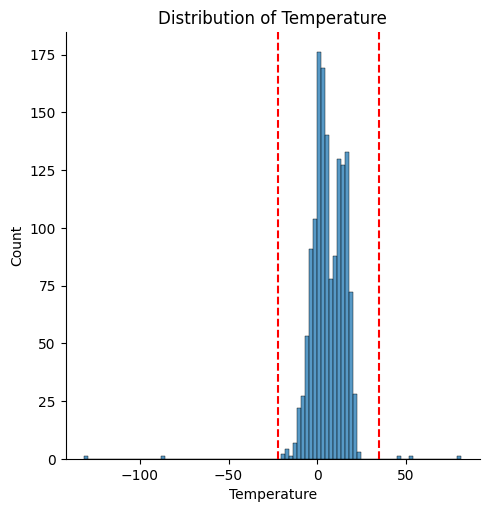

In [17]:
# Finner øvre og nedre grense
lower_limit, upper_limit = fc.lower_upper_limit(temperature)

# Sier at de verdiene som er utenfor grensene lagres i outliers
outliers = temperature[temperature['verdi'].between(lower_limit, upper_limit) == False]
print(outliers) 

# Visualiserer datasettet med øvre og nedre grense 
plot = sns.displot(data=temperature['verdi']).set(title="Distribution of Temperature", xlabel="Temperature")
for ax in plot.axes.flat:
    ax.axvline(lower_limit, color='r', linestyle='--', label='Lower Limit')
    ax.axvline(upper_limit, color='r', linestyle='--', label='Upper Limit')

Her ser vi at de fem ekstreme verdiene vi har lagt til er utenfor standardavviket. De blir derfor ikke tatt med når vi gjør resten av dataanalysen.

[52.5, -87.39999999999999, 81.0, 46.4, -131.1]
Den minste verdien er: -18.9
Den høyeste verdien er: 23.3


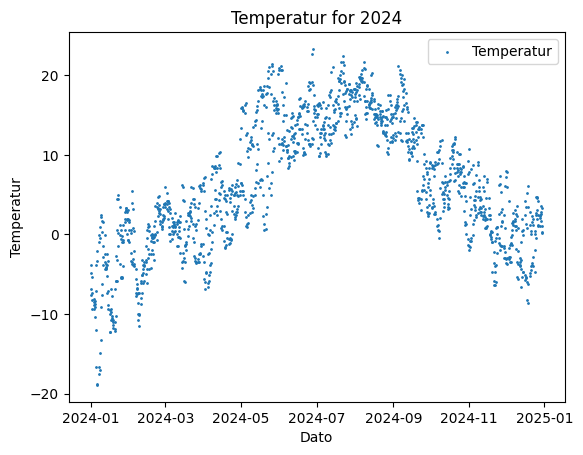

In [18]:
# Alle verdiene som er utenfor standardavviket legges i lista remove
remove = []
for i in outliers['verdi']:
    remove.append(i)
print(remove)

# Verdiene i temperature som er lik verdiene i remove byttes ut med NaN
temperature['verdi'] = temperature['verdi'].replace(remove, np.nan)

# print den laveste og høyeste verdien for å vise at verdiene har endret seg
print('Den minste verdien er:', temperature['verdi'].min())
print('Den høyeste verdien er:', temperature['verdi'].max())

# Visualiserer datasettet uten ekstreme verdier
plt.scatter(date, temperature['verdi'], label="Temperatur", s=1)
plt.xlabel('Dato') 
plt.ylabel('Temperatur') 
plt.title('Temperatur for 2024') 
plt.legend()
plt.show()

Unnamed: 0         0
verdi              5
tidsforskyvning    0
referansetid       0
dtype: int64
      Unnamed: 0  verdi tidsforskyvning              referansetid
147          147    NaN            PT6H 2024-03-14 00:00:00+00:00
676          676    NaN            PT0H 2024-12-04 00:00:00+00:00
1304        1304    NaN            PT0H 2024-10-14 00:00:00+00:00
1372        1372    NaN            PT0H 2024-11-17 00:00:00+00:00
1427        1427    NaN            PT6H 2024-12-14 00:00:00+00:00


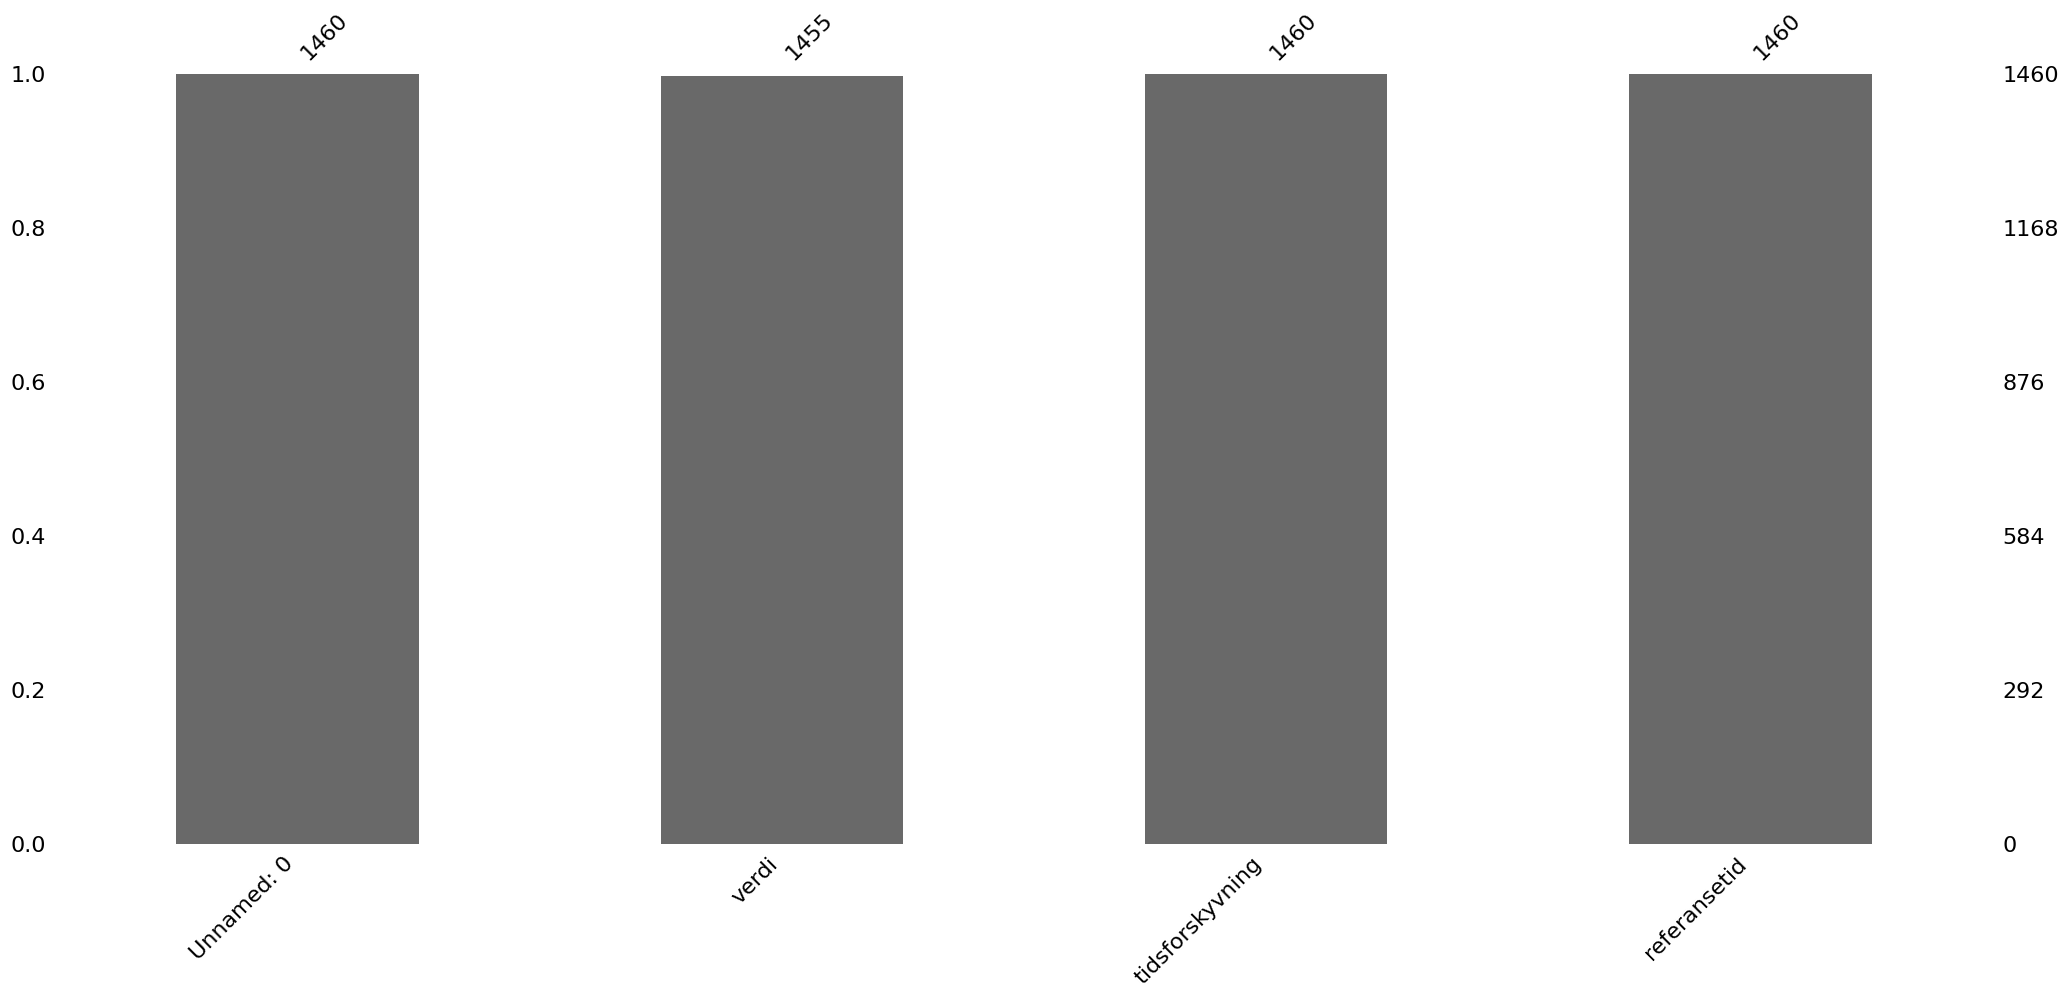

In [19]:
# Sjekker hvor mange og hvilke av verdiene som mangler
fc.missing_numbers(temperature)

C:\Users\sofie\AppData\Local\Temp\ipykernel_15244\606207285.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  add_data = temperature['verdi'].fillna(method='ffill', inplace=True)
C:\Users\sofie\AppData\Local\Temp\ipykernel_15244\606207285.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  add_data = temperature['verdi'].fillna(method='ffill', inplace=True)


Unnamed: 0         0
verdi              0
tidsforskyvning    0
referansetid       0
dtype: int64
Empty DataFrame
Columns: [Unnamed: 0, verdi, tidsforskyvning, referansetid]
Index: []


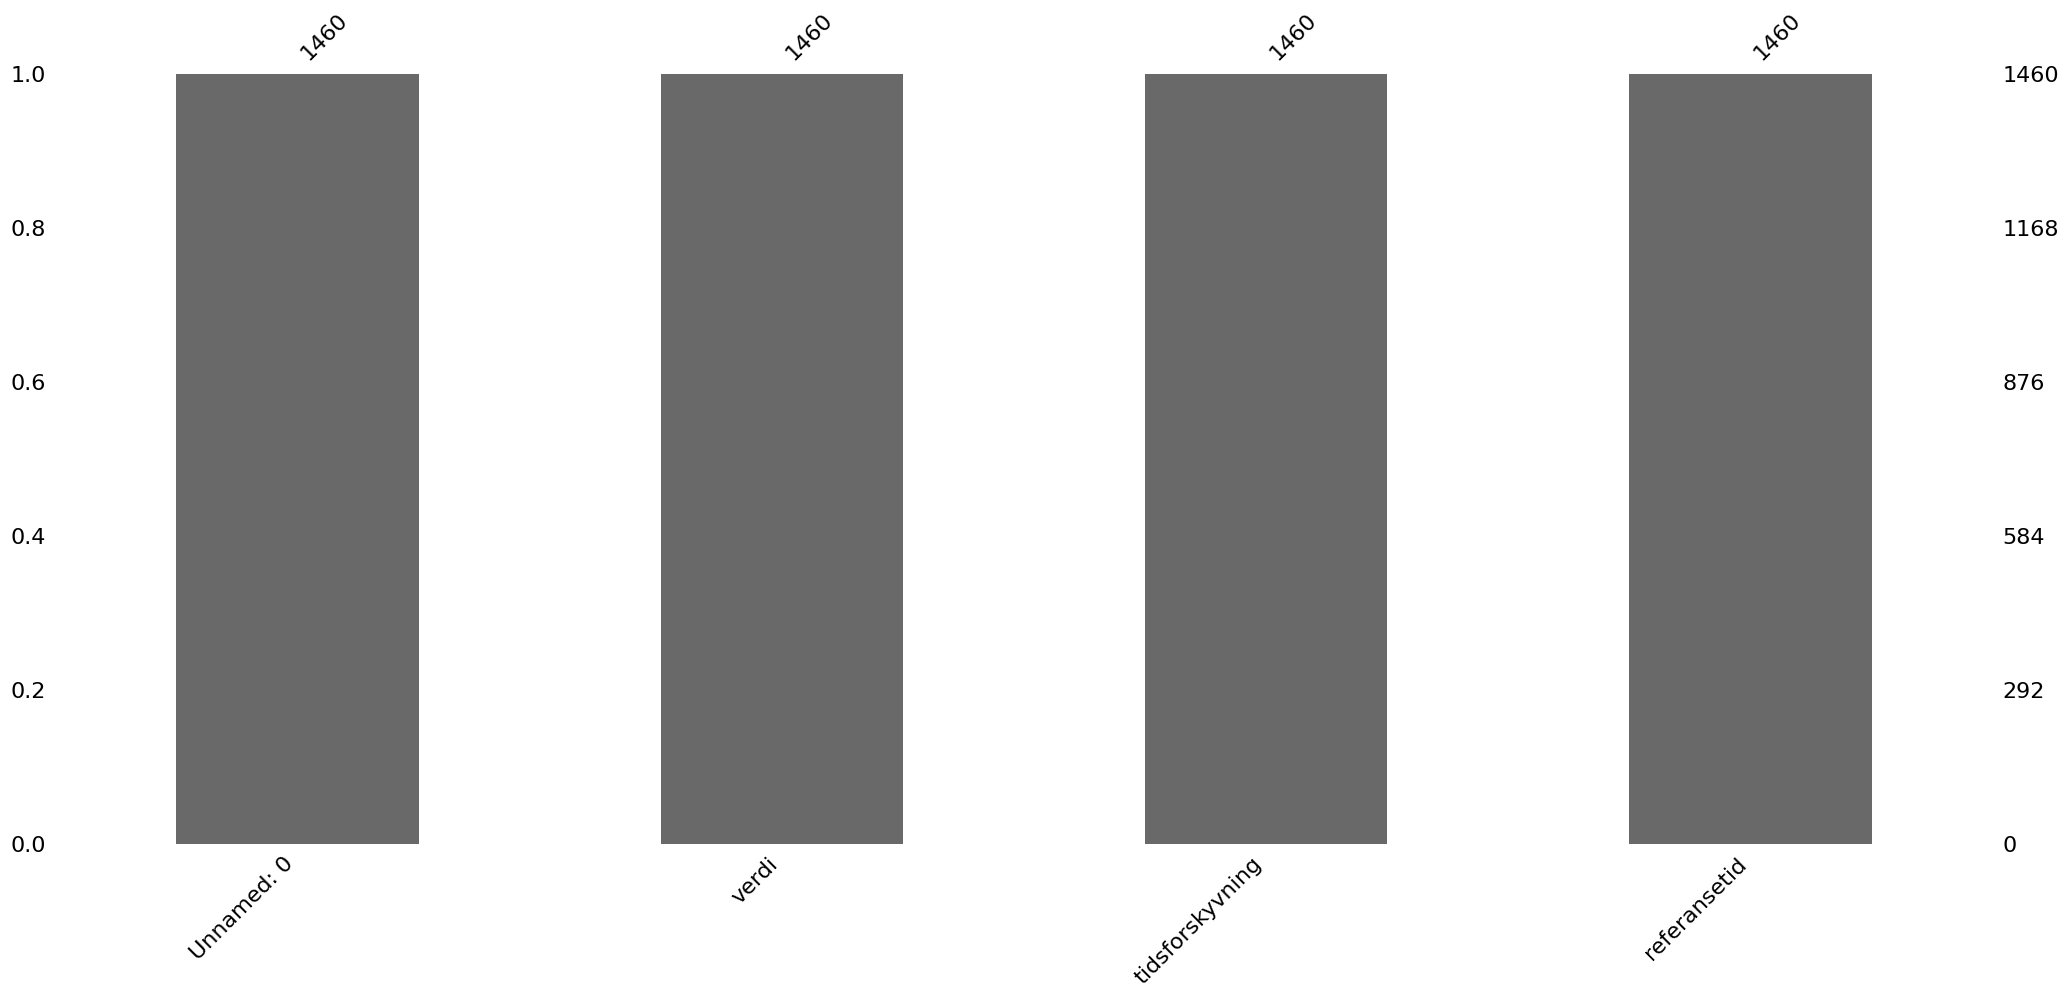

In [20]:
# Gjør NaN om til neste verdi i fila 
add_data = temperature['verdi'].fillna(method='ffill', inplace=True)

# Sjekker at verdiene er fylt inn
fc.missing_numbers(temperature)

Finner ut om hvor mange ganger hver dato skjer i temperatur-dataen. Dette er viktig om vi velger å finne gjennomsnittet for hver dag og visualisere det. Og har visualisert hele temperatur-datasettet.

Counter({Timestamp('2024-01-01 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-02 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-03 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-04 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-05 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-06 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-07 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-08 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-09 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-10 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-11 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-12 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-13 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-14 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-15 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-16 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-17 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-18 00:00:00+0000', tz='UTC'): 4, Timestamp('2024-01-19 00:00:00+0000', tz='UTC'): 4, Tim

<BarContainer object of 365 artists>

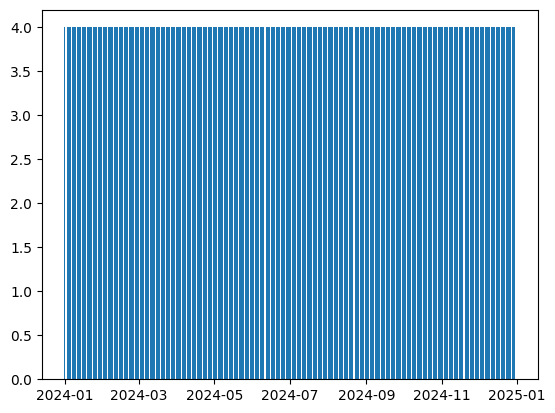

In [21]:
# Teller hvor mange ganger hver dato skjer i temperatur tabellen.
days = Counter(temperature['referansetid'])
print(days)

# Finner ut om det er noen datoer som har flere verdier enn andre.
for i in days:
    if days[i] != 4:
        print (i)

# Viser visuelt om det er noen datoer som har flere verdier enn andre.
plt.bar(days.keys(), days.values())

# Ulike visualiseringer

### Tidsforskyvning

Jobber med å visualisere de forskjellige tidsforskyvningene. Plottet er interaktivt og det kan zoomes inn.

In [22]:
# Visualiserer de ulike tidsforskyvningene
fig = px.scatter(temperature, 
                x= 'referansetid', 
                y= 'verdi', 
                color= 'tidsforskyvning', 
                trendline= 'ols'
                )

fig.update_layout(title=dict(text='Temperatur')
)
fig.show()


Ut ifra dette plottet virker det ikke som at de ulike tidsforskyvningene påvirker temperaturen så veldig.

In [23]:
# Finner gjennomsnittet for hver av tidsforskyvningene
fc.average_other(temperature)


tidsforskyvning
PT0H    6.25
PT6H    6.24
Name: verdi, dtype: float64

Gjennomsnittet av tidsforskyvningene bekrefter det plottet viser.

### Statistiske verdier
Jobber her med å visualisere ulike statistiske verdier. Planen er å også lage funksjoner for median og standeravvik. Disse funksjonene lages sånn at de kan brukes på alle tre av datasettene våre uten at vi må gjøre endringer i selve koden. 

Gjennomsnittlig verdi for datasettet er 6.25


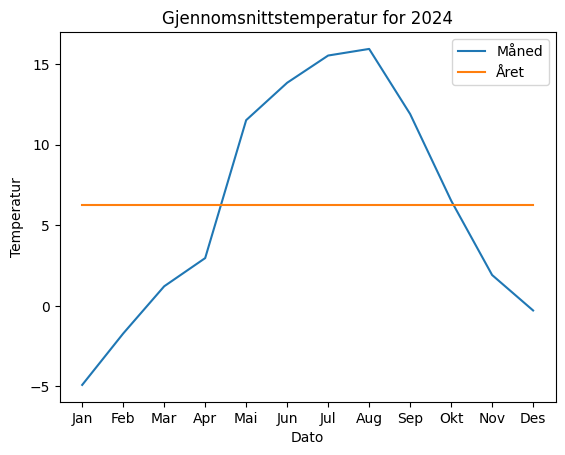

In [24]:
# Regner ut gjennomsnittet for hver måned
monthly_average = fc.average_other(temperature)


# Visualiserer gjennomsnittlig temperatur for hver måned
months = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des'] 
plt.plot(months, monthly_average, label="Måned")

# Visualiserer gjennomsnittstemperaturen for hele året
mean = fc.average_year(temperature)
plt.plot(months, mean*np.ones(len(months)), label="Året")

plt.xlabel('Dato') 
plt.ylabel('Temperatur') 
plt.title('Gjennomsnittstemperatur for 2024') 
plt.legend()

Visualiseringen av gjennomsnittstemperaturene per måned viser at det er høyest temperatur på sommeren og at temperaturen igjen synker frem mot vinteren. Ut ifra hvordan vi vet temperaturene pleier å være, gir dette absolutt mening.

Gjennomsnittet for året ligger omtrent midt på grafen for det månedlige gjennomsnittet og det virker derfor som at gjennomsnittet er korrekt.

array([[<Axes: title={'center': 'verdi'}>]], dtype=object)

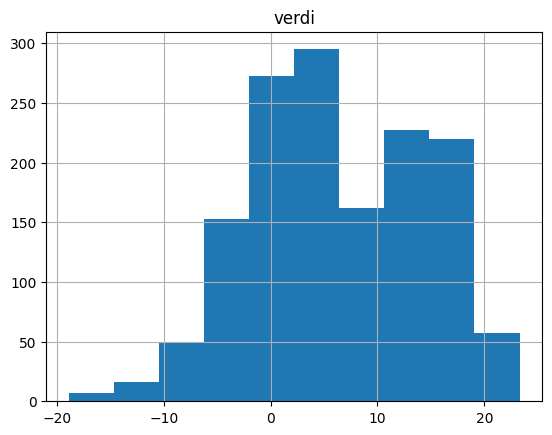

In [25]:
temperature.hist('verdi')

Dette viser at det er flest datoer som har hatt mellom ca.3 til 7 grader celsius. Dette gir mening siden både vår og høst har like temperaturer som pleier å ligge i dette området.